11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1469 - accuracy: 0.9547 - val_loss: 0.0523 - val_accuracy: 0.9824
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0481 - val_accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0275 - val_accuracy: 0.9916


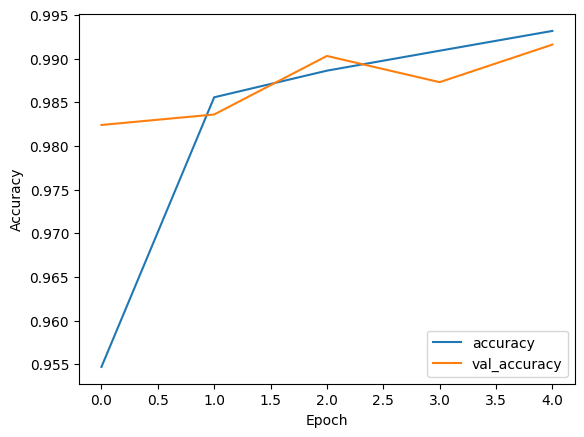

313/313 - 2s - loss: 0.0275 - accuracy: 0.9916 - 2s/epoch - 7ms/step
Test accuracy: 0.991599977016449
1/1 [==============================] - 0s 110ms/step
Predictions: [[6.5495880e-11 2.3561884e-07 6.1835990e-09 9.7142831e-08 1.0986588e-06
  7.5129691e-10 7.9978981e-13 9.9999797e-01 7.1438402e-09 6.3331976e-07]
 [1.5667207e-07 7.2544606e-07 9.9999642e-01 1.7396397e-09 1.4949154e-07
  1.2518539e-10 2.4583712e-06 1.3807147e-08 1.0029986e-09 4.3813727e-11]
 [4.5450331e-08 9.9996102e-01 7.9463393e-07 9.1508429e-10 9.7324246e-06
  2.3854518e-06 1.4455827e-07 1.3409756e-05 6.9936891e-06 5.3699086e-06]
 [9.9997258e-01 1.7767074e-07 1.0358171e-06 3.2503028e-08 1.5623460e-05
  2.6999807e-09 7.4408365e-07 1.3208482e-07 1.2305923e-08 9.6809381e-06]
 [1.2996645e-09 9.7328312e-10 4.1017878e-09 4.7567367e-11 9.9998951e-01
  6.6762080e-09 2.3251069e-08 3.9702069e-10 6.9289335e-08 1.0370371e-05]]
Predicted labels: [7, 2, 1, 0, 4]
True labels: [7 2 1 0 4]


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to fit the CNN input shape
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Make predictions on a few test images
predictions = model.predict(x_test[:5])
print('Predictions:', predictions)
print('Predicted labels:', [tf.argmax(p).numpy() for p in predictions])
print('True labels:', y_test[:5])


In [2]:
model.save("handwritten_digit_recognition_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
